# Initialization

In [ ]:
!pip install kaggle

In [ ]:
#%rm .kaggle
#!mkdir .kaggle
import json
token = {"username":"drawabc","key":"ca4b7a996e21e49deda4bbb7cc1b8dcc"}
with open("/content/.kaggle/kaggle.json", "w") as file:
    json.dump(token, file)
print("Success")

Success


sample_data


In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -p /content

100% 336M/337M [00:08<00:00, 56.7MB/s]
100% 337M/337M [00:08<00:00, 43.8MB/s]


# Reading data and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive/CZ4041
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_im

In [ ]:
!unzip \*.zip

drive  sample_data
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
# Read train and test dataset
path = '/content/drive/My Drive/CZ4041'
train_df = pd.read_csv(path + '/cell_images', usecols=features_to_take + ['isFraud'])
test_df = pd.read_csv(path + '/dataset/test_transaction.csv', usecols=features_to_take)


train_df_id = pd.read_csv(path + '/dataset/train_identity.csv', usecols=features_to_take_id)
test_df_id = pd.read_csv(path + '/dataset/test_identity.csv', usecols=features_to_take_id_test)


In [ ]:
from keras import layers
from keras import models

Using TensorFlow backend.


# Model

In [ ]:


base_dir = "/content/drive/My Drive/CZ4041/cell_images/cell_images"

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape= (100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary', 
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary', subset='validation')


model.save('malaria.h5')



Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/15
689/689 [==============================] - 82s 119ms/step - loss: 0.5323 - acc: 0.7222 - val_loss: 0.2085 - val_acc: 0.8869
Epoch 2/15
689/689 [==============================] - 75s 109ms/step - loss: 0.2126 - acc: 0.9263 - val_loss: 0.2454 - val_acc: 0.9356
Epoch 3/15
689/689 [==============================] - 74s 107ms/step - loss: 0.1651 - acc: 0.9475 - val_loss: 0.1434 - val_acc: 0.9362
Epoch 4/15
689/689 [==============================] - 101s 147ms/step - loss: 0.1464 - acc: 0.9540 - val_loss: 0.2875 - val_acc: 0.9339
Epoch 5/15
689/689 [==============================] - 74s 107ms/step - loss: 0.1359 - acc: 0.9570 - val_loss: 0.0245 - val_acc: 0.9425
Epoch 6/15
689/689 [==============================] - 72s 105ms/step - loss: 0.1285 - acc: 0.9586 - val_loss: 0.1982 - val_acc: 0.9456
Epoch 7/15
689/689 [==============================] - 71s 103ms/step - loss: 0.1218 - acc: 0.9604 - val_loss: 0.0582 - val_acc: 0.9479
Epoch 8/15
689/689 [==============================] - 

# Results

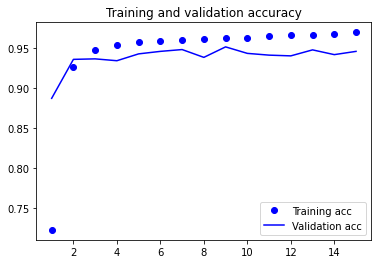

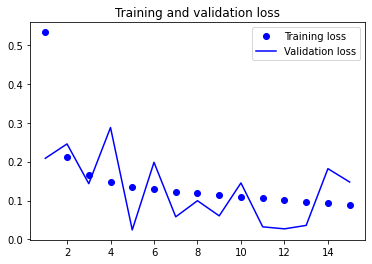

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
save_path = "/content/drive/My Drive/CZ4041/"
model.save_weights(save_path+'malaria_weights.h5')

In [ ]:
import json
model_json = model.to_json()
with open(save_path+'model.json', "w") as json_file:
    json.dump(model_json, json_file)